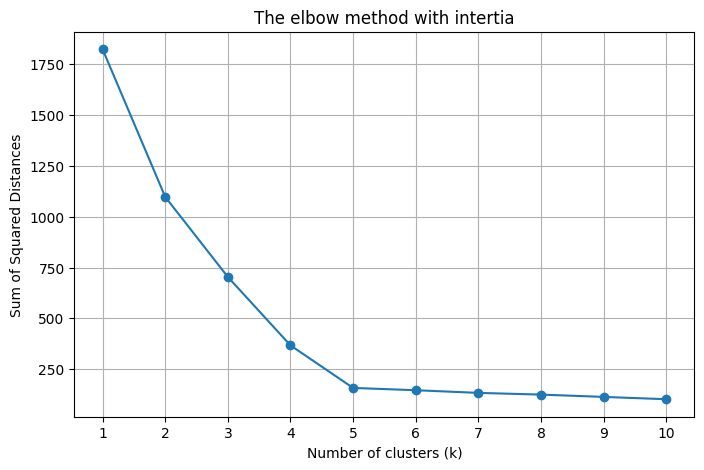

In [3]:
# Import useful libraries. Feel free to use sklearn.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


X, _ = make_blobs(
    n_samples=1000,
    centers=[[0, 0], [1, 1], [-1, 1], [-1, -1], [1, -1]],
    cluster_std=[0.2, 0.3, 0.3, 0.3, 0.3],
    random_state=26,
)


def plot_curve(X, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(
            kmeans.inertia_
        )

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), distortions, marker="o")
    plt.title("The elbow method with intertia")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Sum of Squared Distances")
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()


plot_curve(X)

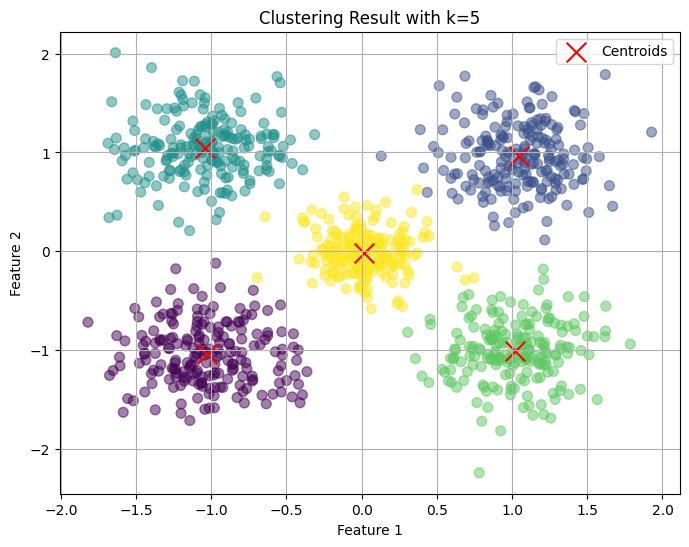

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, alpha=0.5)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red",
    marker="x",
    s=200,
    label="Centroids",
)
plt.title("Clustering Result with k=5")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

I chose K=5 because this is the elbow of the elbow plot. I found that the inertia
decrease slows down after this point.